In [11]:
import numpy as np
import matplotlib.image as mpimg

import matplotlib.pyplot as plt
import cv2

%matplotlib inline

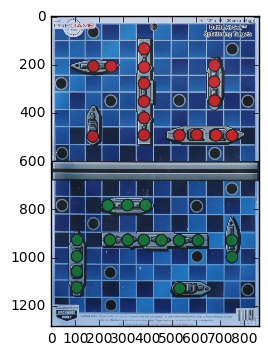

In [12]:
template = cv2.imread('./Targets/BaseCrop.JPG')
h, w = template.shape[:2]
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
plt.imshow(template)

In [13]:
one_shot = cv2.imread('./Targets/1.JPG')
one_shot = cv2.cvtColor(one_shot, cv2.COLOR_BGR2RGB)

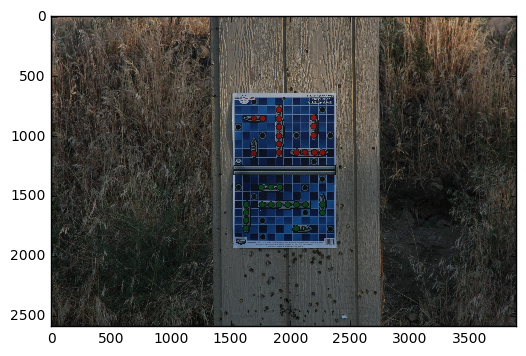

In [14]:
plt.imshow(one_shot)

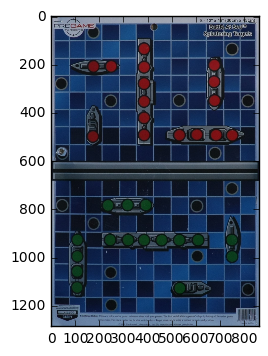

In [15]:
# find template in new image
result = cv2.matchTemplate(one_shot, template, cv2.TM_SQDIFF_NORMED)

# determine dimensions of target
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
top_left = min_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

# draw a rectangle around target
#cv2.rectangle(one_shot, top_left, bottom_right, 255, 5)

# crop out the target
crop_img = one_shot[top_left[1]:top_left[1] + h, top_left[0]:top_left[0] + w]
plt.imshow(crop_img)

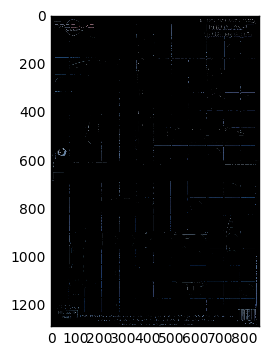

In [18]:
diff = cv2.absdiff(template, crop_img)

# TODO: play around with different color space to avoid detecting minor differences in images
mask = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)

threshold = 75
imask =  mask>threshold

canvas = np.zeros_like(crop_img, np.uint8)
canvas[imask] = crop_img[imask]

#cv2.imwrite("result.png", canvas)
plt.imshow(canvas)